# **Importación de librerias**

In [ ]:
!pip install funpymodeling
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ========================================================
# Importación de librerias necesarias para manipulación y exploración de datos
# ========================================================
import pandas as pd
from datetime import datetime
import numpy as np
import pandas as pd
# ========================================================
# Importación de librerías necesarias para la visualización de datos para Python, permite crear gráficos y visualizaciones en 2D y 3D.
# ========================================================
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# ========================================================
# Importación de librerias necesarias para el analisis de datos, en este caso, para hallar correlaciones.
# ========================================================
from funpymodeling.exploratory import corr_pair
# ========================================================

In [ ]:
# ========================================================
# Importanción necesarias para los modelos en general y para regresiones
# ========================================================
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# ========================================================
from sklearn.preprocessing import PolynomialFeatures
# ========================================================
# Importación de librerias necesarias para modelo KNN
# ========================================================
from sklearn.neighbors import KNeighborsRegressor
# ========================================================
# Importación de librerias necesarias para modelo de Arboles de Desición
# ========================================================
from sklearn.tree import DecisionTreeRegressor
# ========================================================
# Importación de librerias necesarias para modelo de Bosques Aleatorios
# ========================================================
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import pandas_profiling
# ========================================================
# Importación de librerias necesarias para modelo de Red Neuronal
# ========================================================
from sklearn.neural_network import MLPRegressor
# ========================================================
# Importación de librerias necesarias para la validación de datos obtenidos
# ========================================================
import tensorflow as tf

# **Apertura del CSV**

In [ ]:
# ==================================================================================================
# Se define la ruta del archivo CSV que se va a leer y se almacena en la variable 'path_csv'
path_csv='/content/drive/MyDrive/Codigo_Final/Data_2015-2022.csv'

# Se utiliza la biblioteca pandas para leer el archivo CSV en un DataFrame llamado 'df'.
# La opción 'encoding' se establece en 'windows-1252' para especificar la codificación del archivo CSV.
df= pd.read_csv(path_csv, encoding='windows-1252')
# ==================================================================================================

## Preparación de la tabla o arreglo del dataset

In [ ]:
# Se cambia el nombre de las columnas del DataFrame 'df' por los nombres especificados en la lista
df.columns=['CodigoEstacion',	'CodigoSensor',	'FechaObservacion', 'Dia', 'Mes', 'Anio', 'Fecha', 'Hora',	'Humedad',
            'Humedad_UnidadMedida',	'Precipitacion',	'Precipitacion_UnidadMedida',	'PresionAtmosferica',	
            'PresionAtmosferica_UnidadMedida', 'Temperatura',	'Temperatura_UnidadMedida',
            'NombreEstacion',	'Departamento',	'Municipio',	'ZonaHidrografica',	'Latitud',	'Longitud']

In [ ]:
# Se imprime los tipos de datos de cada columna del DataFrame 'df'
df.dtypes

CodigoEstacion                       int64
CodigoSensor                         int64
FechaObservacion                    object
Dia                                  int64
Mes                                  int64
Anio                                 int64
Fecha                               object
Hora                                 int64
Humedad                            float64
Humedad_UnidadMedida                object
Precipitacion                      float64
Precipitacion_UnidadMedida          object
PresionAtmosferica                 float64
PresionAtmosferica_UnidadMedida     object
Temperatura                        float64
Temperatura_UnidadMedida            object
NombreEstacion                      object
Departamento                        object
Municipio                           object
ZonaHidrografica                    object
Latitud                            float64
Longitud                           float64
dtype: object

In [ ]:
# Se trasforma la clase de columna Fecha a Datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format="%m/%d/%Y")

# Se obtiene el numero de dia que corresponde al año
df['Dia'] = pd.to_datetime(df['Fecha']).dt.strftime("%j")
df['Dia'] = df['Dia'].astype('int')

In [ ]:
# Se inserta la columna 'Dia' almacenada en la posición 5 (índice 4) del DataFrame 'df'
columna_Almacenada = df.pop('Dia') 
df.insert(5, 'Dia', columna_Almacenada) 

In [ ]:
# Se ordena el DataFrame por la columna 'FechaObservacion' en orden ascendente
df=df.sort_values(by='FechaObservacion') 

In [ ]:
# Se muestran las primeras cinco filas del DataFrame para comprobar que todo haya quedado como se busca
df.head()

,CodigoEstacion,CodigoSensor,FechaObservacion,Mes,Anio,Dia,Fecha,Hora,Humedad,Humedad_UnidadMedida,...,PresionAtmosferica,PresionAtmosferica_UnidadMedida,Temperatura,Temperatura_UnidadMedida,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud
37735,21205012,27,1/1/2015 0:00,1,2015,1,2015-01-01,0,91.0,%,...,754.3,HPa,8.4,°C,UNIVERSIDAD NACIONAL - AUT,BOGOTA,BOGOTA D.C,ALTO MAGDALENA,4.638083,-74.089083
88203,21206960,27,1/1/2015 0:00,1,2015,1,2015-01-01,0,67.0,%,...,746.6,HPa,11.2,°C,IDEAM BOGOTA - AUT,BOGOTA,BOGOTA D.C,ALTO MAGDALENA,4.600000,-74.066667
88213,21206960,27,1/1/2015 10:00,1,2015,1,2015-01-01,10,31.0,%,...,747.1,HPa,17.2,°C,IDEAM BOGOTA - AUT,BOGOTA,BOGOTA D.C,ALTO MAGDALENA,4.600000,-74.066667
37745,21205012,27,1/1/2015 10:00,1,2015,1,2015-01-01,10,41.0,%,...,751.9,HPa,17.8,°C,UNIVERSIDAD NACIONAL - AUT,BOGOTA,BOGOTA D.C,ALTO MAGDALENA,4.638083,-74.089083
88214,21206960,27,1/1/2015 11:00,1,2015,1,2015-01-01,11,36.0,%,...,746.5,HPa,18.2,°C,IDEAM BOGOTA - AUT,BOGOTA,BOGOTA D.C,ALTO MAGDALENA,4.600000,-74.066667


# **Entendimiento de la data**

In [ ]:
# Estadisticas del dataset
df.describe()

,CodigoEstacion,CodigoSensor,Mes,Anio,Dia,Hora,Humedad,Precipitacion,PresionAtmosferica,Temperatura,Latitud,Longitud
count,1.432820e+05,143282.0,143282.000000,143282.000000,143282.000000,143282.000000,143282.000000,143282.000000,143282.000000,143282.000000,143282.000000,143282.000000
mean,2.120594e+07,27.0,6.470596,2018.385471,181.445701,11.449742,73.503153,0.016441,748.112469,14.950512,4.631674,-74.084043
std,8.468699e+02,0.0,3.387249,2.174920,103.427014,6.909338,16.146659,0.135463,18.009332,3.270078,0.027814,0.014709
min,2.120501e+07,27.0,1.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,600.100000,0.000000,4.600000,-74.102667
25%,2.120501e+07,27.0,4.000000,2017.000000,92.000000,5.000000,61.000000,0.000000,746.900000,12.700000,4.600000,-74.102667
50%,2.120571e+07,27.0,6.000000,2018.000000,181.000000,11.000000,73.500000,0.000000,751.200000,14.500000,4.638083,-74.089083
75%,2.120696e+07,27.0,9.000000,2020.000000,269.000000,17.000000,86.300000,0.000000,753.100000,17.300000,4.669333,-74.066667
max,2.120696e+07,27.0,12.000000,2022.000000,366.000000,23.000000,100.000000,8.116667,762.800000,49.800000,4.669333,-74.066667


In [ ]:
# Tamaño del dataset
df.shape

(143282, 22)

In [ ]:
# ¿Qué estaciones tenemos?
estaciones=df["CodigoEstacion"].unique()
print(estaciones)

[21205012 21206960 21205710]


## **Diagramas**

## Histogramas

### Temperatura

In [ ]:
import matplotlib.pyplot as plot

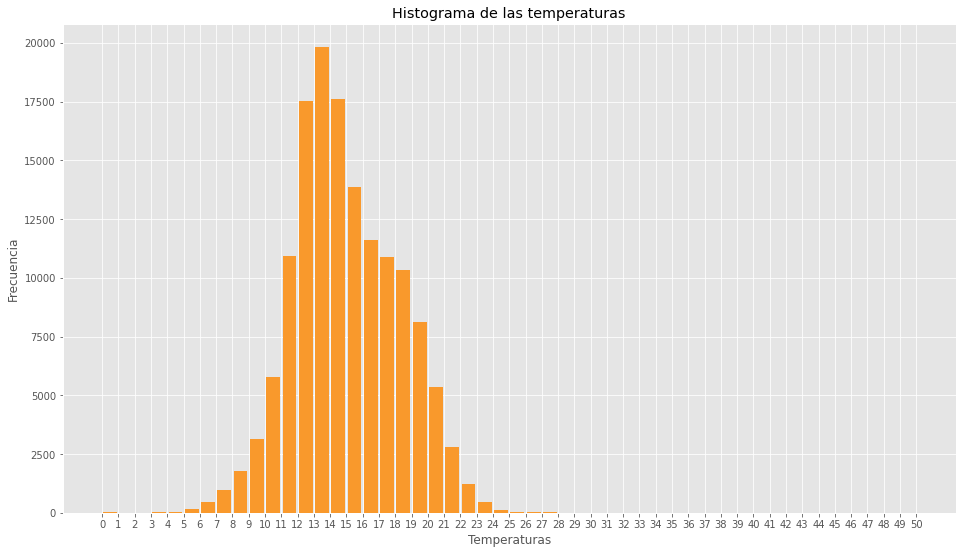

In [ ]:
# Convertir la columna Temperatura en una serie de números enteros
temperaturas = df['Temperatura'].astype(int)

# Especificar los intervalos de los histogramas como un rango de números enteros
intervalos = range(min(temperaturas), max(temperaturas) + 2)

# Crear el histograma
plt.hist(x=temperaturas, bins=intervalos, color='#F9992C', rwidth=0.85)

# Establecer el título y etiquetas del eje
plot.title('Histograma de las temperaturas')
plot.xlabel('Temperaturas')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)

# Mostrar el histograma
plot.show()

### Humedad

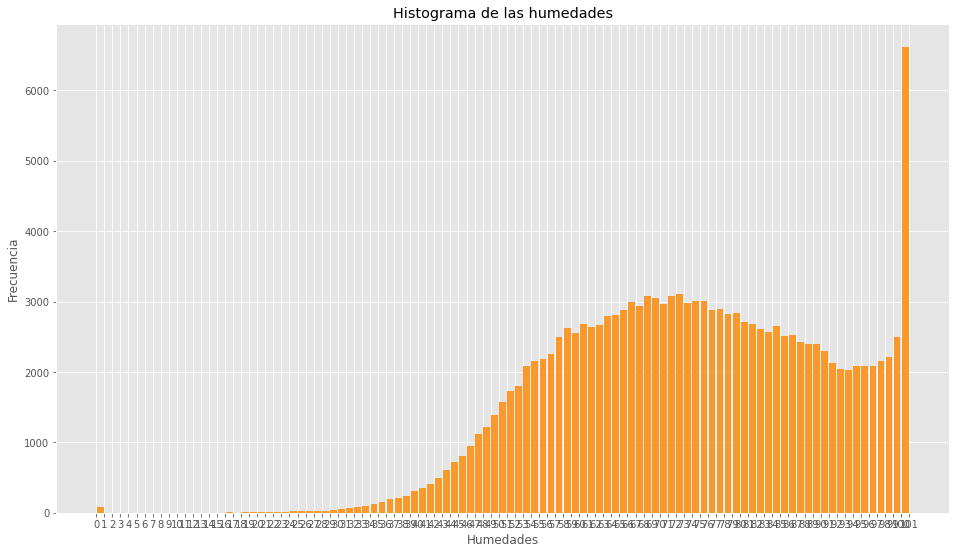

In [ ]:
# Convertir la columna Humedad en una serie de números enteros
temperaturas = df['Humedad'].astype(int)

# Especificar los intervalos de los histogramas como un rango de números enteros
intervalos = range(min(temperaturas), max(temperaturas) + 2)

# Crear el histograma
plt.hist(x=temperaturas, bins=intervalos, color='#F9992C', rwidth=0.85)

# Establecer el título y etiquetas del eje
plt.title('Histograma de las humedades')
plt.xlabel('Humedades')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

# Mostrar el histograma
plt.show()


### Precipitación

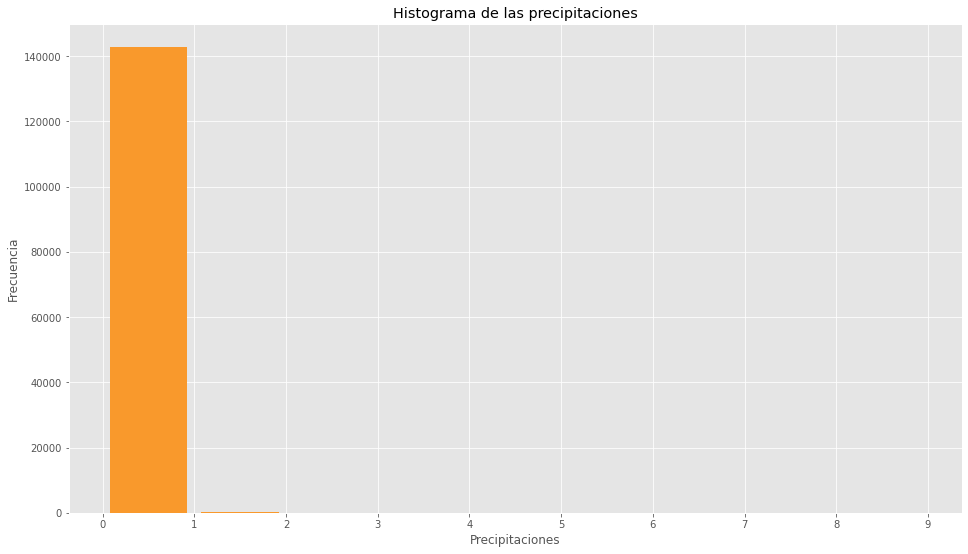

In [ ]:
# Convertir la columna Precipitacion en una serie de números enteros
temperaturas = df['Precipitacion'].astype(int)

# Especificar los intervalos de los histogramas como un rango de números enteros
intervalos = range(min(temperaturas), max(temperaturas) + 2)

# Crear el histograma
plt.hist(x=temperaturas, bins=intervalos, color='#F9992C', rwidth=0.85)

# Establecer el título y etiquetas del eje
plot.title('Histograma de las precipitaciones')
plot.xlabel('Precipitaciones')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)

# Mostrar el histograma
plot.show()


### Presión Atmosferica

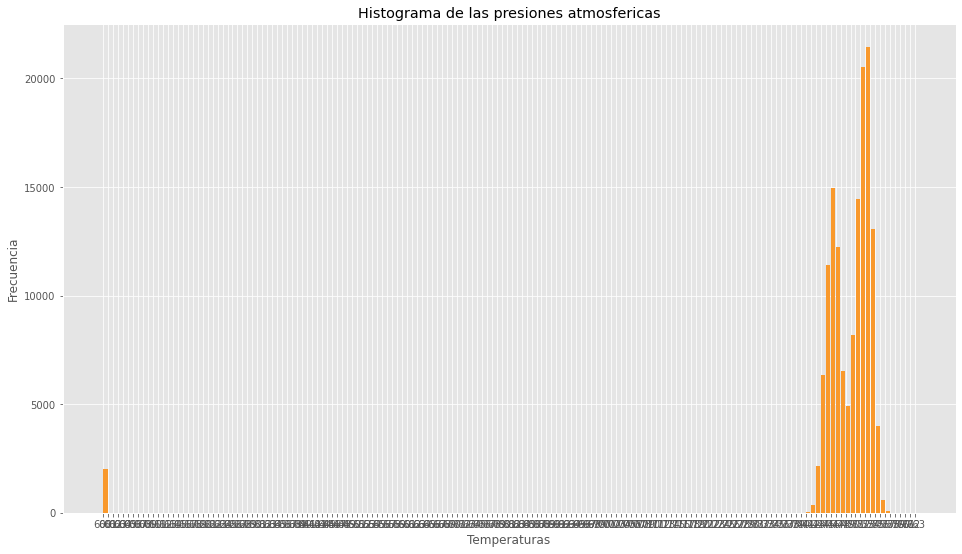

In [ ]:
# Convertir la columna PresionAtmosferica en una serie de números enteros
temperaturas = df['PresionAtmosferica'].astype(int)

# Especificar los intervalos de los histogramas como un rango de números enteros
intervalos = range(min(temperaturas), max(temperaturas) + 2)

# Crear el histograma
plt.hist(x=temperaturas, bins=intervalos, color='#F9992C', rwidth=0.85)

# Establecer el título y etiquetas del eje
plot.title('Histograma de las presiones atmosfericas')
plot.xlabel('Temperaturas')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)

# Mostrar el histograma
plot.show()


## Diagramas de correlación

### Diagramas por hora

#### Temperatura

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

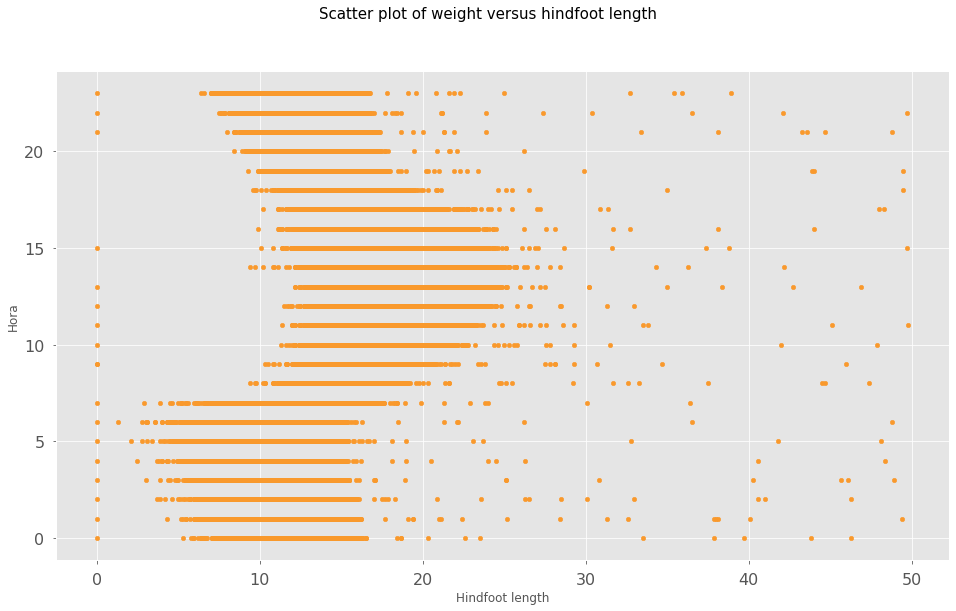

In [ ]:
# Crear una figura de matplotlib y un eje
fig, ax1 = plt.subplots()

# Crear el gráfico de dispersión utilizando la columna "Temperatura" en el eje y, y la columna "Hora" en el eje x
df.plot("Temperatura", "Hora",color='#F9992C', kind="scatter", ax=ax1)

# Realizar ajustes al gráfico utilizando matplotlib
ax1.set_xlabel("Hindfoot length") # Establecer etiqueta del eje x
ax1.tick_params(labelsize=16, pad=8) # Ajustar tamaño y separación de las marcas en los ejes
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15) # Establecer título del gráfico

#### Humedad

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

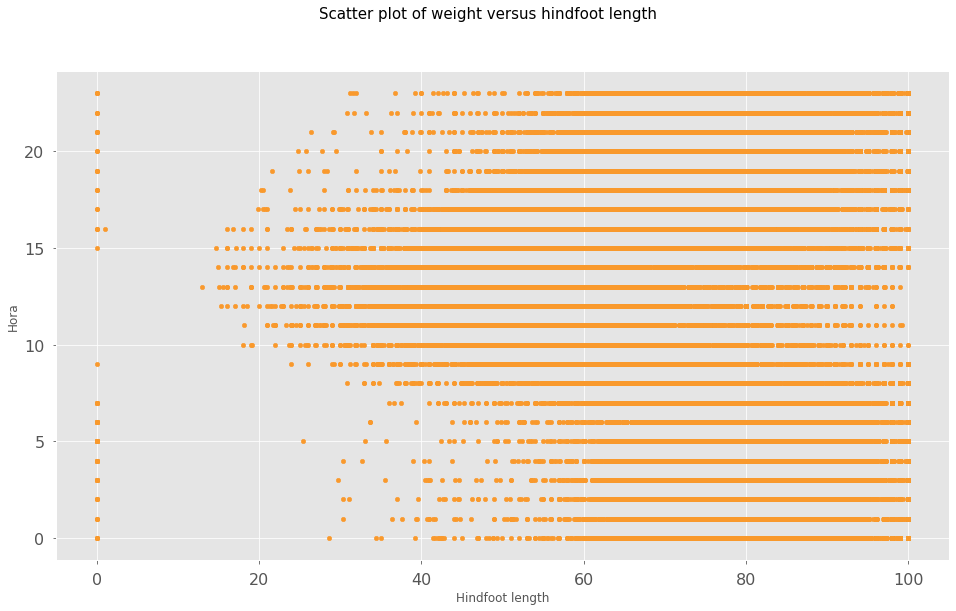

In [ ]:
# Crear una figura de matplotlib y un eje
fig, ax1 = plt.subplots()

# Crear el gráfico de dispersión utilizando la columna "Humedad" en el eje y, y la columna "Hora" en el eje x
df.plot("Humedad", "Hora",color='#F9992C', kind="scatter", ax=ax1)

# Realizar ajustes al gráfico utilizando matplotlib
ax1.set_xlabel("Hindfoot length") # Establecer etiqueta del eje x
ax1.tick_params(labelsize=16, pad=8) # Ajustar tamaño y separación de las marcas en los ejes
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15) # Establecer título del gráfico

#### Precipitación

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

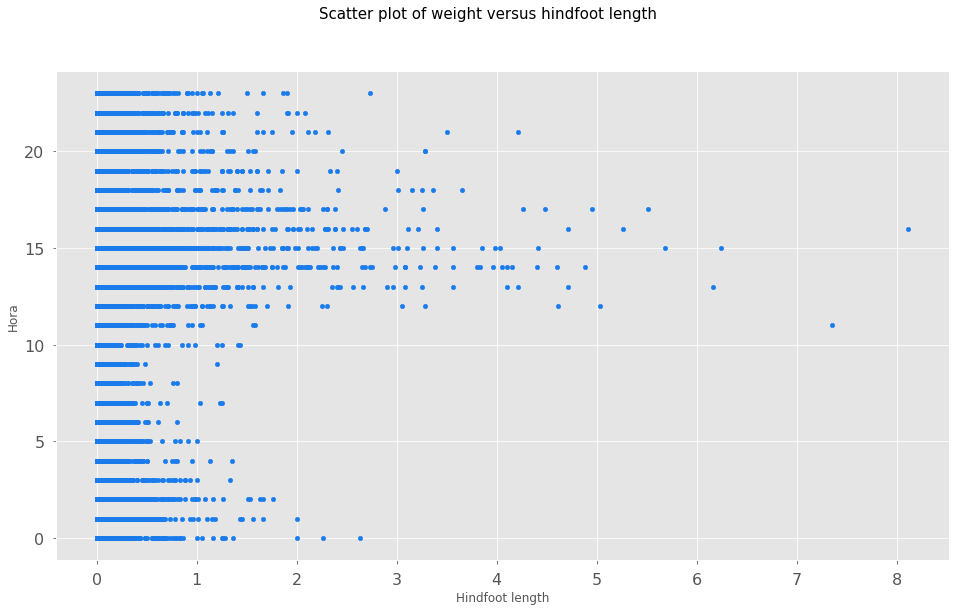

In [ ]:
# Crear una figura de matplotlib y un eje
fig, ax1 = plt.subplots()

# Crear el gráfico de dispersión utilizando la columna "Humedad" en el eje y, y la columna "Hora" en el eje x
df.plot("Precipitacion", "Hora", color='#1A7CEC', kind="scatter", ax=ax1)

# Realizar ajustes al gráfico utilizando matplotlib
ax1.set_xlabel("Hindfoot length") # Establecer etiqueta del eje x
ax1.tick_params(labelsize=16, pad=8) # Ajustar tamaño y separación de las marcas en los ejes
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15) # Establecer título del gráfico

#### Presión Atmosferica

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

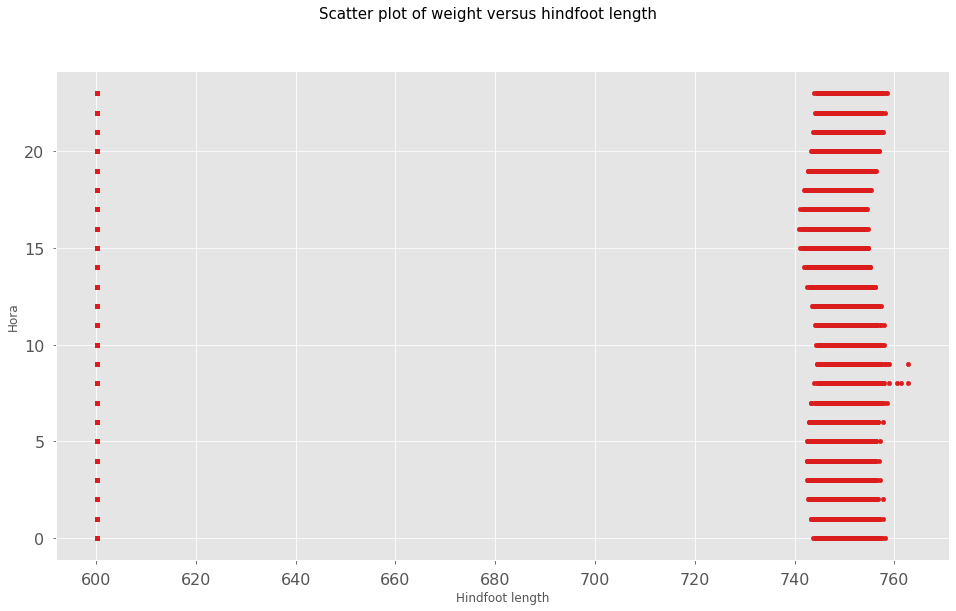

In [ ]:
# Crear una figura de matplotlib y un eje
fig, ax1 = plt.subplots()

# Crear el gráfico de dispersión utilizando la columna "Humedad" en el eje y, y la columna "Hora" en el eje x
df.plot("PresionAtmosferica", "Hora", color='#DC1D1D', kind="scatter", ax=ax1)

# Realizar ajustes al gráfico utilizando matplotlib
ax1.set_xlabel("Hindfoot length") # Establecer etiqueta del eje x
ax1.tick_params(labelsize=16, pad=8) # Ajustar tamaño y separación de las marcas en los ejes
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15) # Establecer título del gráfico

### Diagramas por humedad


#### Temperatura

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

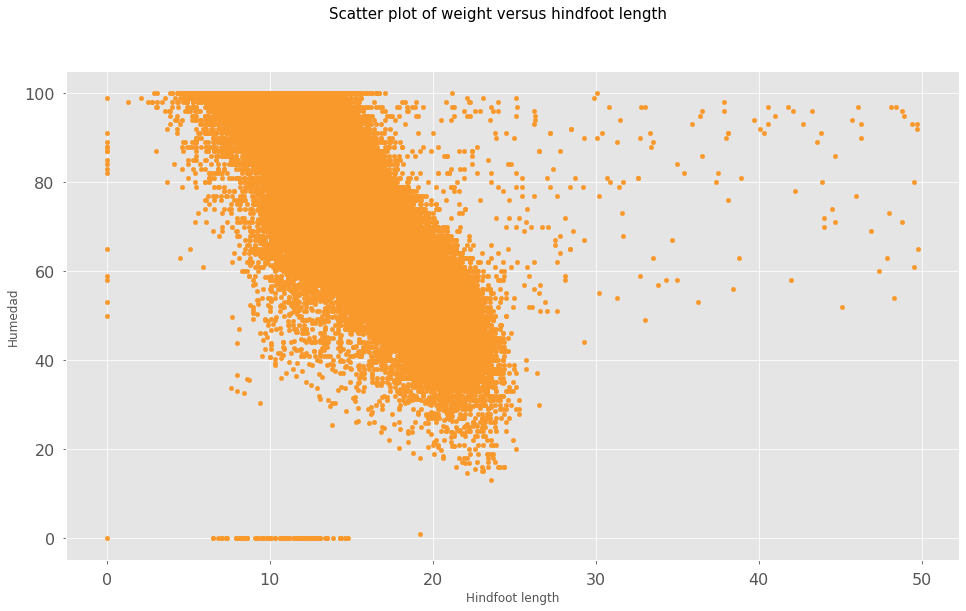

In [ ]:
fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Temperatura", "Humedad", color='#F9992C', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

#### Precipitación

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

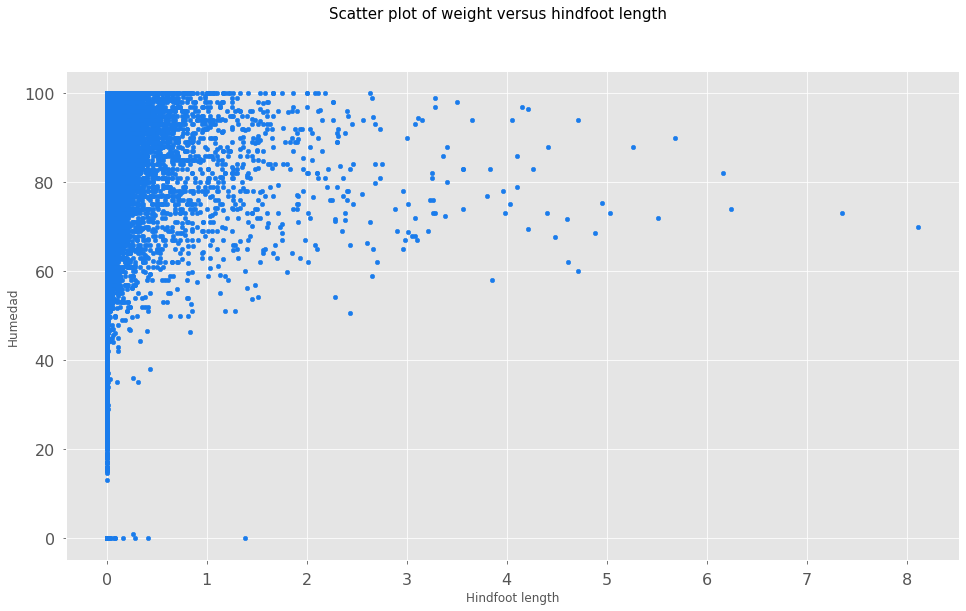

In [ ]:
fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Precipitacion", "Humedad", color='#1A7CEC', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

#### Presión Atmosferica

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

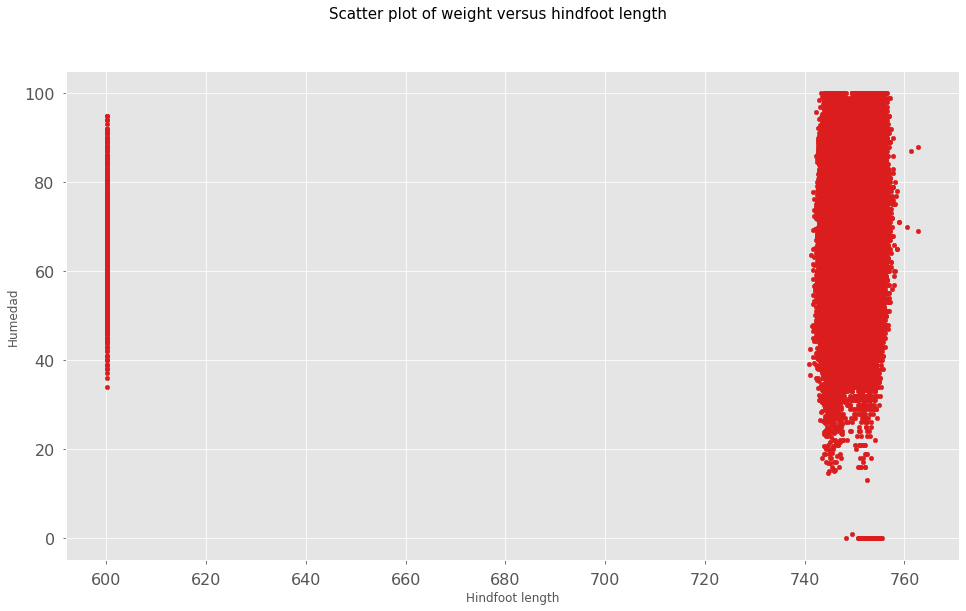

In [ ]:
fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("PresionAtmosferica", "Humedad", color='#DC1D1D', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

### Diagramas por precipitación


#### Temperatura


Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

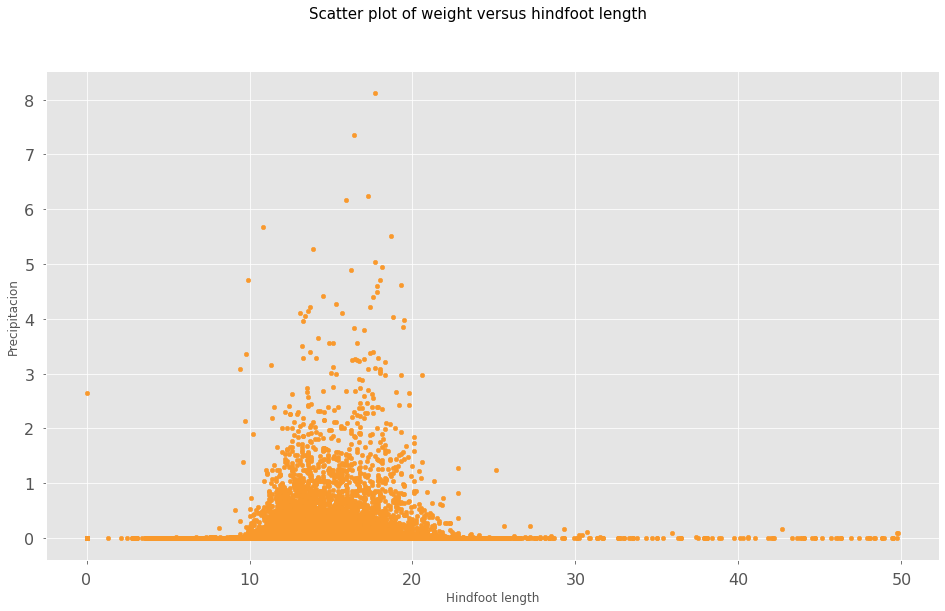

In [ ]:
fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Temperatura", "Precipitacion", color='#F9992C', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

#### Humedad

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

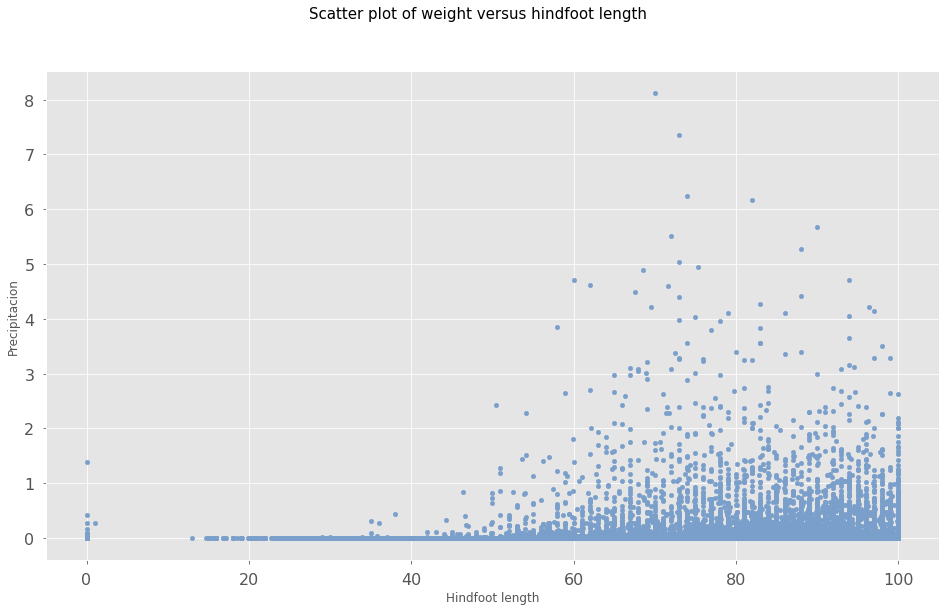

In [ ]:
fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Humedad", "Precipitacion", color='#799FCA', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

#### Presión Atmosferica

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

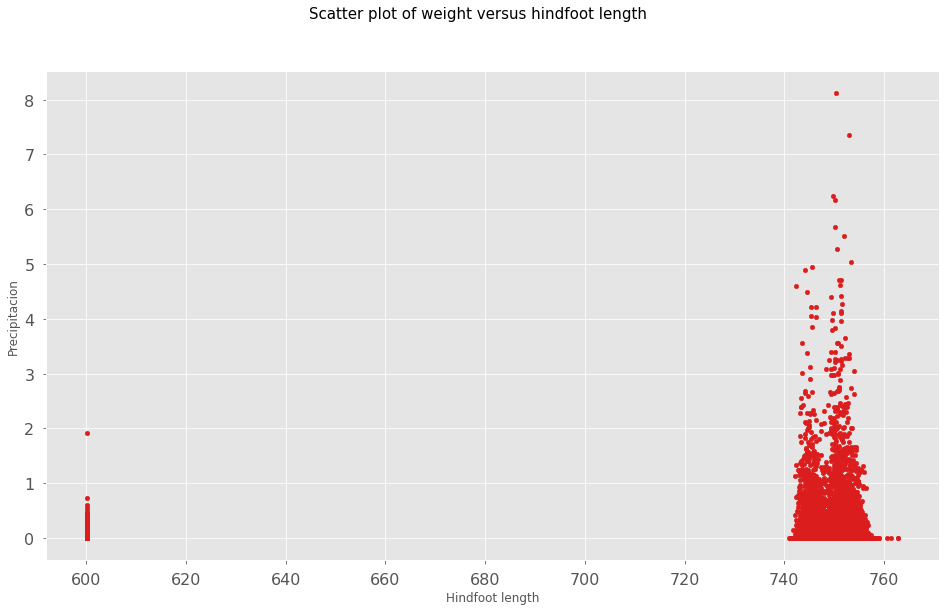

In [ ]:
fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("PresionAtmosferica", "Precipitacion", color='#DC1D1D', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

### Presión Atmosferica

#### Temperatura

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

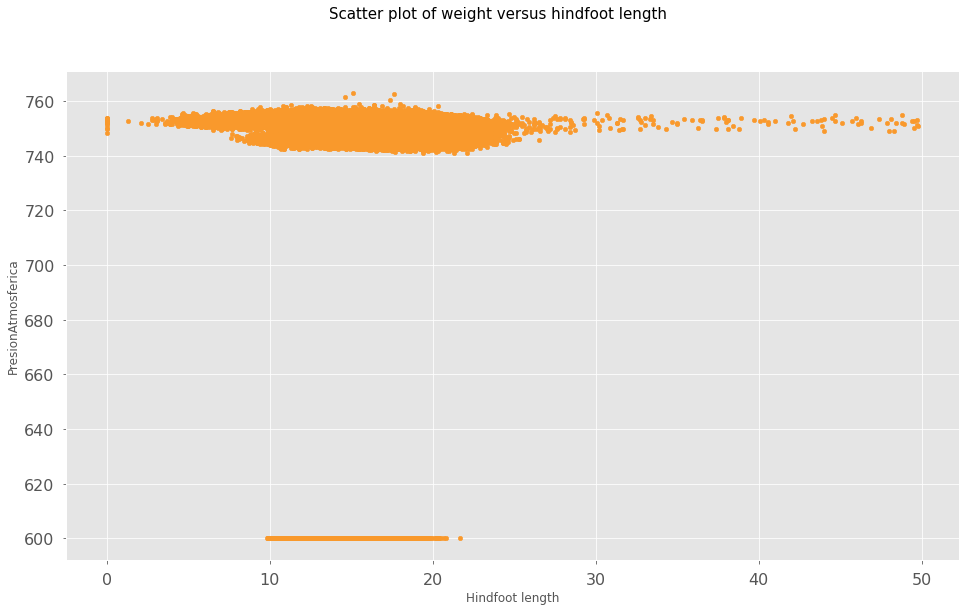

In [ ]:
fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Temperatura", "PresionAtmosferica", color='#F9992C', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

#### Humedad

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

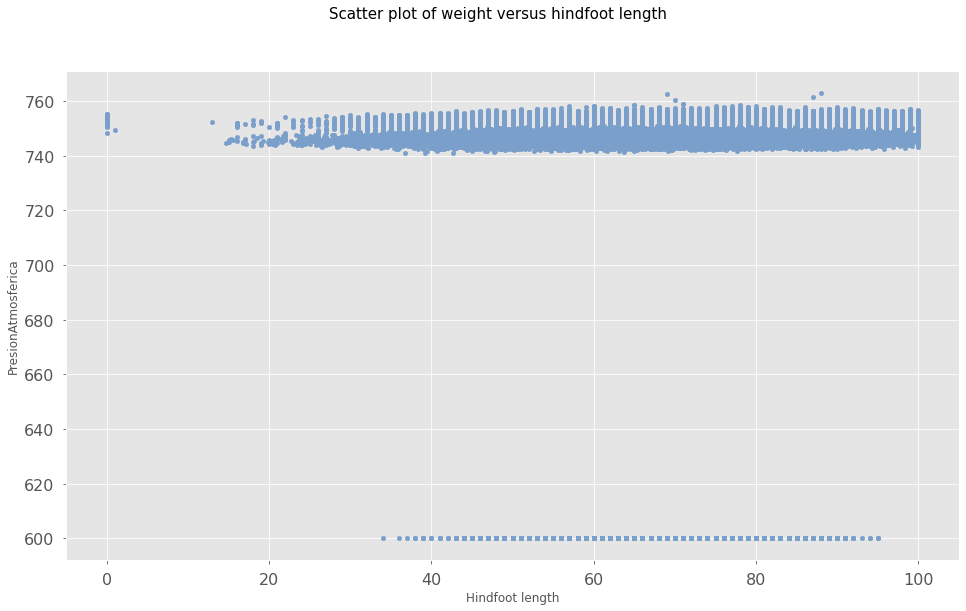

In [ ]:
fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Humedad", "PresionAtmosferica", color='#799FCA', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

#### Precipitación

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

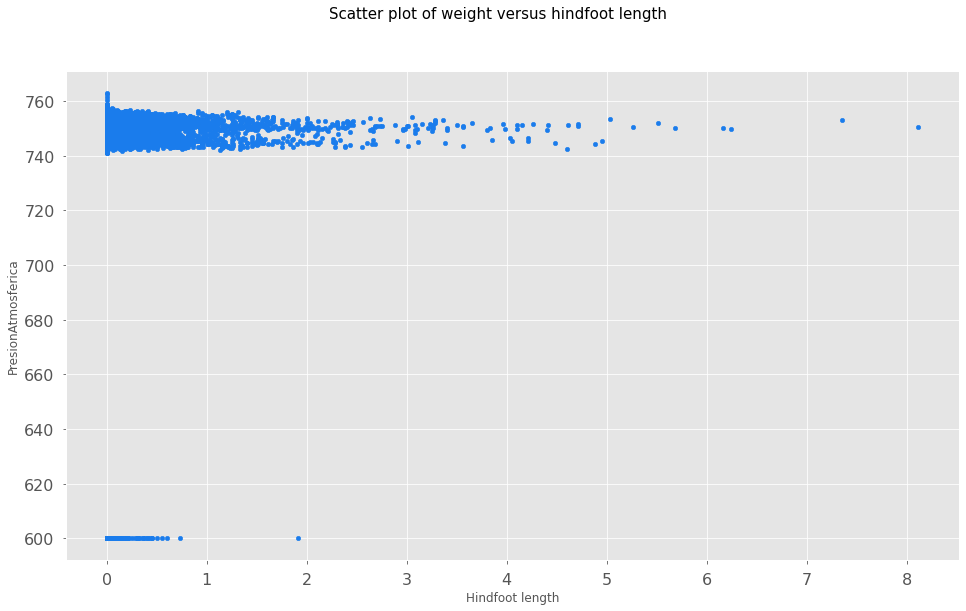

In [ ]:
fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Precipitacion", "PresionAtmosferica", color='#1A7CEC', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

## Diagrama de matriz de correlaciones

In [ ]:
# Calcular la matriz de correlación de Spearman
contamina_cor=df.corr(method='spearman')

# Imprimir la matriz de correlación
contamina_cor

,CodigoEstacion,CodigoSensor,Mes,Anio,Dia,Hora,Humedad,Precipitacion,PresionAtmosferica,Temperatura,Latitud,Longitud
CodigoEstacion,1.000000,NaN,-0.010643,0.001768,-0.010361,-0.003132,-0.154358,-0.004123,-0.754538,-0.030373,-0.611196,0.611196
CodigoSensor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mes,-0.010643,NaN,1.000000,-0.028949,0.996493,-0.002463,0.010981,-0.013272,0.016124,-0.022821,0.041985,-0.041985
Anio,0.001768,NaN,-0.028949,1.000000,-0.028537,-0.008676,0.153466,0.016869,0.169729,-0.062134,0.290513,-0.290513
Dia,-0.010361,NaN,0.996493,-0.028537,1.000000,-0.002457,0.011882,-0.012955,0.015532,-0.023135,0.042075,-0.042075
Hora,-0.003132,NaN,-0.002463,-0.008676,-0.002457,1.000000,-0.243172,0.023074,-0.048054,0.356830,-0.000789,0.000789
Humedad,-0.154358,NaN,0.010981,0.153466,0.011882,-0.243172,1.000000,0.208033,0.307420,-0.809464,0.304995,-0.304995
Precipitacion,-0.004123,NaN,-0.013272,0.016869,-0.012955,0.023074,0.208033,1.000000,-0.008494,-0.070769,-0.019623,0.019623
PresionAtmosferica,-0.754538,NaN,0.016124,0.169729,0.015532,-0.048054,0.307420,-0.008494,1.000000,-0.184583,0.747638,-0.747638
Temperatura,-0.030373,NaN,-0.022821,-0.062134,-0.023135,0.356830,-0.809464,-0.070769,-0.184583,1.000000,-0.099016,0.099016


<Axes: >

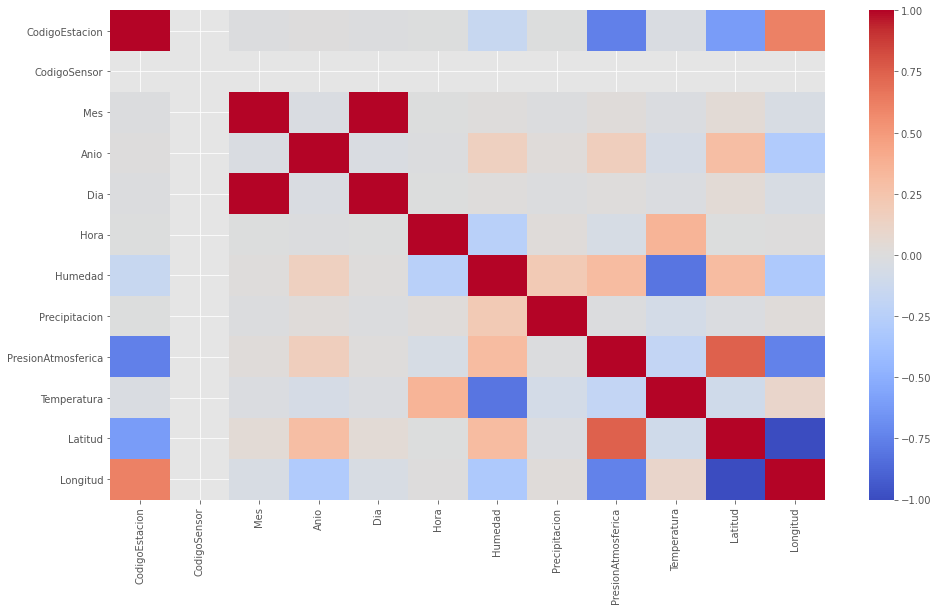

In [ ]:
# Generar un mapa de calor de la matriz de correlación
sns.heatmap(contamina_cor,
            xticklabels=contamina_cor.columns,
            yticklabels=contamina_cor.columns,
            cmap='coolwarm')

In [ ]:
# Calcular la matriz de correlación y guardar el resultado en res
res=corr_pair(df)

# Mostrar las primeras filas del resultado
res.head()

,v1,v2,R,R2
1,CodigoSensor,CodigoEstacion,NaN,NaN
2,Mes,CodigoEstacion,-0.016393,0.000269
3,Anio,CodigoEstacion,-0.045939,0.002110
4,Dia,CodigoEstacion,-0.016391,0.000269
5,Hora,CodigoEstacion,-0.002645,0.000007


In [ ]:
# Filtrar las variables que tienen alta correlación con la variable objetivo 'Temperatura'
# La columna "v1" y "v2" indican las variables que se están comparando, "R" representa el coeficiente de correlación de Pearson, que indica la fuerza y dirección de la relación lineal entre las dos variables. 
# El valor de R siempre oscila entre -1 y 1, donde -1 indica una fuerte correlación inversa, 1 indica una fuerte correlación positiva y 0 indica que no hay relación lineal entre las dos variables. 
# La columna "R2" indica la cantidad de varianza en una variable que se puede explicar por la otra variable.

# Se toman los que sean mayores a 0.1 en R2
def extraccion_correlacion (variable):
  res_target_ordered=res[res['v2']==variable].sort_values('R2',ascending=False)
  return res_target_ordered

In [ ]:
# Seleccionamos las variables con un valor alto de R2 (mayor que 0.5 en este caso)
def variables_mayores_correlaciones(res_target_ordered):
  variables_altamente_correlacionadas = res_target_ordered[res_target_ordered['R2'] > 0.1]['v1'].tolist()
  return variables_altamente_correlacionadas

# **Creación de Dataframe para el modelo de Machine Learning**

Inicialmente se dividira en dos Dataframe, uno para realizar el entrenamiento de los modelos y el otro para las pruebas de los resultados.

En segundo lugar, se prepara el Dataframe con las columnas necesarias para realizar los entrenamientos.




In [ ]:
# Crear un subconjunto de datos para entrenamiento (desde 01/01/2015 hasta 31/08/2022)
dfATrabajar=df[df["Fecha"]<='2022-08-31']

# Crear un subconjunto de datos para pruebas (desde 01/09/2022 hasta 30/09/2022)
dfPruebas=df[df["Fecha"]>'2022-08-31']

Preparación del Dataframe para entrenar

In [ ]:
# Seleccionar las columnas que se utilizarán en el análisis
dfAAnalisar=dfATrabajar[['CodigoEstacion',	'CodigoSensor', 'FechaObservacion', 
                         'Dia', 'Mes', 'Anio',	'Hora',	'Humedad',
                         'Precipitacion', 'PresionAtmosferica', 'Temperatura',
                         'Latitud',	'Longitud']]

In [ ]:
# Impresión del DataFrame
dfAAnalisar

,CodigoEstacion,CodigoSensor,FechaObservacion,Dia,Mes,Anio,Hora,Humedad,Precipitacion,PresionAtmosferica,Temperatura,Latitud,Longitud
37735,21205012,27,1/1/2015 0:00,1,1,2015,0,91.0,0.0,754.3,8.4,4.638083,-74.089083
88203,21206960,27,1/1/2015 0:00,1,1,2015,0,67.0,0.0,746.6,11.2,4.600000,-74.066667
88213,21206960,27,1/1/2015 10:00,1,1,2015,10,31.0,0.0,747.1,17.2,4.600000,-74.066667
37745,21205012,27,1/1/2015 10:00,1,1,2015,10,41.0,0.0,751.9,17.8,4.638083,-74.089083
88214,21206960,27,1/1/2015 11:00,1,1,2015,11,36.0,0.0,746.5,18.2,4.600000,-74.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143242,21206960,27,9/9/2021 8:00,252,9,2021,8,69.6,0.0,748.3,13.5,4.600000,-74.066667
37695,21205710,27,9/9/2021 8:00,252,9,2021,8,81.0,0.0,754.4,14.2,4.669333,-74.102667
143243,21206960,27,9/9/2021 9:00,252,9,2021,9,65.9,0.0,748.7,14.4,4.600000,-74.066667
37696,21205710,27,9/9/2021 9:00,252,9,2021,9,74.0,0.0,754.9,15.1,4.669333,-74.102667


# **Modelos de Machine Learning**


In [ ]:
# Creación de variables por separado donde contendran una representación Numpy del DataFrame
# Cada variable corresponde a una columna del DataFrame dfAAnalisar
cod=dfAAnalisar['CodigoEstacion'].values
fechaCompleta=dfAAnalisar['FechaObservacion'].values
fechaDia=dfAAnalisar['Dia'].values
fechaMes=dfAAnalisar['Mes'].values
fechaAnio=dfAAnalisar['Anio'].values
fechaHora=dfAAnalisar['Hora'].values
humedad=dfAAnalisar['Humedad'].values
precipitacion=dfAAnalisar['Precipitacion'].values
presionAtmosferica=dfAAnalisar['PresionAtmosferica'].values
temperatura=dfAAnalisar['Temperatura'].values

## **Creación de funciones por modelo**

In [ ]:
def generacion_df_pruebas(variable_objetivo):


  lista_posibles=['Temperatura','Humedad','Precipitacion','Presion Atmosferica']

  lista_posibles.remove("Temperatura")


  # Creamos un dataframe vacío para almacenar los resultados
  dfFinalPruebas= pd.DataFrame(columns = ['NombreEstacion','CodigoEstacion','FechaCompleta','Fecha','Hora',f'{variable_objetivo}_Simulada_Regression',
                                          f'{variable_objetivo}_Simulada_Polynomial_Regression',f'{variable_objetivo}_Simulada_KNN',f'{variable_objetivo}_Simulada_Decision_Trees',
                                          f'{variable_objetivo}_Simulada_Random_Forest',f'{variable_objetivo}_Simulada_Red_Neuronal',f'{variable_objetivo}_Real',
                                         'Temperatura','Precipitacion','Humedad','PresionAtmosferica',
                                          'Latitud','Longitud','Altitud'])

  # Inicializamos un contador para el índice del dataframe
  i=0

  # Iteramos sobre cada fila del dataframe de pruebas
  for index, row in dfPruebas.iterrows():

          # Obtenemos las variables por registro del Dataframe que contiene los registros de septiembre
          estacion=row["CodigoEstacion"]
          fechaCompleta=row["FechaObservacion"]
          fecha=row["Fecha"]
          fechaDia=row["Dia"]
          fechaHora=row["Hora"]
          humedad=row["Humedad"]
          precipitacion=row["Precipitacion"]
          presionAtmosferica=row["PresionAtmosferica"]
          temperatura=row["Temperatura"]
          latitud=row["Latitud"]
          longitud=row["Longitud"]

          if variable_objetivo=='Temperatura':
                variable=temperatura
          elif variable_objetivo=="Humedad":
              variable=humedad
          elif variable_objetivo=="Precipitacion":
              variable=precipitacion
          elif variable_objetivo=="PresionAtmosferica":
              variable=presionAtmosferica
              

          if row['CodigoEstacion']==21206960:
            dfFinalPruebas.loc[i]=['IDEAM BOGOTA  - AUT [21206960]',estacion,fechaCompleta,fecha,fechaHora,
                                  0,0,0,0,0,0,variable,temperatura,precipitacion,humedad,presionAtmosferica,
                                  latitud,longitud,2.646]
          elif row['CodigoEstacion']==21205012:
            dfFinalPruebas.loc[i]=['UNIVERSIDAD NACIONAL  - AUT [21205012]',estacion,fechaCompleta,fecha,fechaHora,
                                  0,0,0,0,0,0,variable,temperatura,precipitacion,humedad,presionAtmosferica,
                                  latitud,longitud,2.556]
          else:
            dfFinalPruebas.loc[i]=['JARDIN BOTANICO  - AUT [21205710]',estacion,fechaCompleta,fecha,fechaHora,
                                  0,0,0,0,0,0,variable,temperatura,precipitacion,humedad,presionAtmosferica,
                                  latitud,longitud,2.552]
          
          # Incrementamos el contador del índice del dataframe
          i=i+1

  # Eliminación de la columna objetivo.
  dfFinalPruebas=dfFinalPruebas.drop([variable_objetivo], axis=1)

  return dfFinalPruebas    

In [ ]:
def modelo_regresion_multiple(variables_entrada_array, variable_objetivo_array, variable_objetivo):
  # Entrenamiento del modelo con las variables previamente escogidas.

  # Creación de una matriz NumPy que contiene las características de entrada para el modelo.
  #[humedad,fechaHora]
  X=np.array(variables_entrada_array).T

  # Variable a predecir
  Y=np.array(variable_objetivo_array).T

  # Creamos un objeto de la clase LinearRegression
  reg=LinearRegression()

  # Ajustamos nuestro modelo a los datos de entrenamiento
  reg=reg.fit(X,Y)

  # Hacemos predicciones utilizando nuestro modelo ajustado y los datos de entrenamiento
  Y_pred=reg.predict(X)

  # Variables obtenidas despues de entrenar el modelo
  # Calculamos el error cuadrático medio entre los valores reales (Y) y las predicciones (Y_pred) y se obtiene 
  # la raíz cuadrada del error cuadrático medio para obtener la raíz del error cuadrático medio (RMSE)
  error=np.sqrt(mean_squared_error(Y,Y_pred))

  # Calculamos el coeficiente de determinación (R^2) utilizando el método score() del objeto reg
  # Entre mas cercano a 1 este, mejor sera el resultado.
  r2=reg.score(X,Y)

  # Impresión de los resultados
  print("----------------------------------------------------------------------")
  print("El error para Regresión Lineal es de: ", error)
  print("Valor de R^2 para Regresión Lineal es: ", r2)
  print("Los coeficientes para Regresión Lineal son: ", reg.coef_)
  print("----------------------------------------------------------------------")

  # Iteramos sobre cada fila del dataframe de pruebas
  # Se crea una nueva columna con los datos obtenidos por KNN
  i=0

  for index, row in dfPruebas.iterrows():
    
    dfFinalPruebas[f'{variable_objetivo}_Simulada_Regression'].loc[i]=Y_pred[i]
    #dfFinalPruebas.loc[i, 'Temperatura_Simulada_Regression'] = Y_pred[i]

    i=i+1

  # Se calcula el coeficiente de determinación (R²) utilizando los valores reales de temperatura (Temperatura_Real) 
  # y los valores simulados de temperatura utilizando el modelo y se almacena en la variable r2.
  r2 = r2_score(dfFinalPruebas[f'{variable_objetivo}_Real'], dfFinalPruebas[f'{variable_objetivo}_Simulada_Regression']) 
  #print("El r^2 obtenido despues de las pruebas para el modelo con regresión es de: ", r2)

In [ ]:
def modelo_regresion_polinomial(variables_entrada, variable_objetivo):
  
  # Dividir los datos en conjuntos de entrenamiento y prueba
  X = dfAAnalisar[variables_entrada] # Características
  Y = dfAAnalisar[variable_objetivo] # Variable objetivo
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

  # Preprocesamiento de datos para la regresión polinomial
  poly = PolynomialFeatures(degree=2) # Cambiar el valor de 'degree' según el grado del polinomio que desees
  X_poly = poly.fit_transform(X_train)

  # Entrenar el modelo de regresión polinomial
  reg = LinearRegression()
  reg.fit(X_poly, Y_train)

  # Realizar las predicciones sobre los datos de prueba
  X_poly_test = poly.transform(X_test)
  Y_pred = reg.predict(X_poly_test)

  # Evaluar la precisión del modelo
  # Calculamos el coeficiente de determinación (R^2) utilizando el método score() del objeto reg
  # Entre mas cercano a 1 este, mejor sera el resultado.
  r2 = r2_score(Y_test, Y_pred)

  # Variables obtenidas despues de entrenar el modelo
  # Calculamos el error cuadrático medio entre los valores reales (Y) y las predicciones (Y_pred) y se obtiene 
  # la raíz cuadrada del error cuadrático medio para obtener la raíz del error cuadrático medio (RMSE)
  error=np.sqrt(mean_squared_error(Y_test,Y_pred))

  # Impresión de los resultados
  print("----------------------------------------------------------------------")
  print("El error de Regresión Polinomial es: ", error)
  print("Valor de R^2 para Regresión Polinomial es: ", r2)
  print("Los coeficientes para Regresión Polinomial son: ", reg.coef_)
  print("----------------------------------------------------------------------")

  # Se crea una nueva columna con los datos obtenidos por Regresión Polinomial

  i=0
  for index, row in dfPruebas.iterrows():
    dfFinalPruebas[f'{variable_objetivo}_Simulada_Polynomial_Regression'].loc[i]=Y_pred[i]
    #dfFinalPruebas.loc[i, 'Temperatura_Simulada_Polynomial_Regression'] = Y_pred[i]
    i=i+1
  
  # Se calcula el coeficiente de determinación (R²) utilizando los valores reales de temperatura (Temperatura_Prueba) 
  # y los valores simulados de temperatura utilizando el modelo y se almacena en la variable r2.
  r2 = r2_score(dfFinalPruebas[f'{variable_objetivo}_Real'], dfFinalPruebas[f'{variable_objetivo}_Simulada_Polynomial_Regression']) 
  #print("El r^2 obtenido despues de las pruebas para el modelo con KNN es de: ", r2)

In [ ]:
def modelo_knn(variables_entrada, variable_objetivo):

  # Seleccionar las características que se utilizarán para predecir la variable de salida
  X=dfAAnalisar[variables_entrada]

  # VBariable a predecir
  Y=dfAAnalisar[variable_objetivo]

  # Dividir los datos en conjuntos de entrenamiento y prueba
  # Se divide X en X_train (conjunto de características de entrenamiento) y X_test (conjunto de características de prueba)
  # Se divide Y en Y_train (conjunto de variables de salida de entrenamiento) y Y_test (conjunto de variables de salida de prueba)
  # test_size=.3 indica que el 30% de los datos se utilizarán para el conjunto de prueba y el 70% para el conjunto de entrenamiento
  # random_state=0 se utiliza para que la división se haga de manera determinista, de tal manera que la división siempre sea la misma
  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

  # Busqueda del mejor K para el modelo.
  # Se prepara una lista con valores del 1 al 100, se prueban todos estos y se obtiene 
  # su error cuadrático medio por cada K
  error=[]
  for i in range(1, 101, 1):
    clf=KNeighborsRegressor(i)
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    error.append(mean_squared_error(Y_test,Y_pred))

  # Obtención del mejor k, se busca el que de el menor error
  minimo=min(error)
  i_min = error.index(minimo)
  knn=i_min+1

  # Entrenamiento del modelo KNN con regresión
  clf=KNeighborsRegressor(knn)
  clf.fit(X_train,Y_train)
  y_pred=clf.predict(X_test)

  # Evaluar la precisión del modelo
  r2 = r2_score(Y_test, Y_pred)

  # Variables obtenidas despues de entrenar el modelo
  # Calculamos el error cuadrático medio entre los valores reales (Y) y las predicciones (Y_pred) y se obtiene 
  # la raíz cuadrada del error cuadrático medio para obtener la raíz del error cuadrático medio (RMSE)
  error=np.sqrt(mean_squared_error(Y_test,Y_pred))

  # Calculamos el coeficiente de determinación (R^2) utilizando el método score() del objeto reg
  # Entre mas cercano a 1 este, mejor sera el resultado.
  r2=clf.score(X_train,Y_train)
  
  # Impresión de los resultados
  print("----------------------------------------------------------------------")
  print("El error de KNN es: ", error)
  print("Valor de R^2 para KNN es: ", r2)
  #print("Los coeficientes para KNN son: : ", reg.coef_)
  print("----------------------------------------------------------------------")

  # Se crea una nueva columna con los datos obtenidos por KNN

  i=0
  for index, row in dfPruebas.iterrows():
    
    dfFinalPruebas[f'{variable_objetivo}_Simulada_KNN'].loc[i]=Y_pred[i]
    #dfFinalPruebas.loc[i, 'Temperatura_Simulada_KNN'] = Y_pred[i]
    i=i+1

  r2 = r2_score(dfFinalPruebas[f'{variable_objetivo}_Real'], dfFinalPruebas[f'{variable_objetivo}_Simulada_KNN']) 
  #print("El r^2 obtenido despues de las pruebas para el modelo con KNN es de: ", r2)

In [ ]:
def modelo_arboles_decision(variables_entrada, variable_objetivo):
  # Dividir los datos en conjuntos de entrenamiento y prueba
  X = dfAAnalisar[variables_entrada]
  Y = dfAAnalisar[variable_objetivo] # Variable objetivo
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

  # Entrenar el modelo de árboles de decisión
  regressor = DecisionTreeRegressor(random_state=3)

  regressor.fit(X_train, Y_train)

  # Realizar las predicciones sobre los datos de prueba
  Y_pred = regressor.predict(X_test)

  # Se crea una nueva columna con los datos obtenidos por KNN

  i=0
  for index, row in dfPruebas.iterrows():
    
    dfFinalPruebas[f'{variable_objetivo}_Simulada_Decision_Trees'].loc[i]=Y_pred[i]
    #dfFinalPruebas.loc[i, 'Temperatura_Simulada_Decision_Trees'] = Y_pred[i]

    i=i+1

  # Evaluar la precisión del modelo
  r2 = r2_score(Y_test, Y_pred)

  # Variables obtenidas despues de entrenar el modelo
  # Calculamos el error cuadrático medio entre los valores reales (Y) y las predicciones (Y_pred) y se obtiene 
  # la raíz cuadrada del error cuadrático medio para obtener la raíz del error cuadrático medio (RMSE)
  error=np.sqrt(mean_squared_error(Y_test,Y_pred))

  # Calculamos el coeficiente de determinación (R^2) utilizando el método score() del objeto reg
  # Entre mas cercano a 1 este, mejor sera el resultado.
  #r2=reg.score(Y_test, Y_pred)

  # Impresión de los resultados
  print("----------------------------------------------------------------------")
  print("El error de Arboles de Desiciones es: ", error)
  print("Valor de R^2 para Arboles de Desiciones es: ", r2)
  #print("Los coeficientes para Arboles de Desiciones son: : ", reg.coef_)
  print("----------------------------------------------------------------------")



  # Se calcula el coeficiente de determinación (R²) utilizando los valores reales de temperatura (Temperatura_Prueba) 
  # y los valores simulados de temperatura utilizando el modelo y se almacena en la variable r2.
  r2 = r2_score(dfFinalPruebas[f'{variable_objetivo}_Real'], dfFinalPruebas[f'{variable_objetivo}_Simulada_Decision_Trees']) 
  #print("El r^2 obtenido despues de las pruebas para el modelo con regresión es de: ", r2)

In [ ]:
def modelo_random_forest(variables_entrada, variable_objetivo):
  
  # Crear la variable X, que almacenará todas las columnas excepto "Temperatura" y "FechaObservacion"
  # "FechaObservacion" se elimina ya que es un dato no numerico
  X = dfAAnalisar[variables_entrada]

  # Crear la variable y, que almacenará solamente la columna "Temperatura"
  Y = dfAAnalisar[variable_objetivo]

  # Crear un objeto scaler de la clase StandardScaler
  scaler = StandardScaler()

  # Usar el objeto scaler para estandarizar el conjunto de datos X
  # La función "fit_transform" de StandardScaler estandariza las características de X,
  # es decir, resta la media y divide por la desviación estándar. El resultado se almacena en X_scaled. 
  # La función "fit" ajusta el scaler a X y la función "transform" lo aplica a X.
  X_scaled = scaler.fit_transform(X)

  # Dividir el conjunto de datos estandarizado X_scaled en conjuntos de entrenamiento y prueba, 
  # y separar la variable objetivo Y en los conjuntos de entrenamiento y prueba correspondientes
  # La función "train_test_split" de sklearn.model_selection divide los datos en conjuntos de entrenamiento y prueba. 
  # El argumento "test_size=0.20" indica que el 20% del conjunto de datos se reservará para la prueba. 
  # El argumento "random_state=42" se utiliza para establecer una semilla aleatoria y garantizar que la división de datos sea reproducible. 
  # X_scaled se divide en X_train (80%) y X_test (20%), y Y se divide en Y_train (80%) y Y_test (20%).

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=42)

  # Crea el clasificador
  model = RandomForestRegressor(n_estimators=100)

  # Entrena el modelo usando el conjunto de entranamiento
  model.fit(X_train, Y_train)

  # Predicción en el conjunto de prueba
  Y_pred = model.predict(X_test)

  # Evaluar la precisión del modelo
  r2 = r2_score(Y_test, Y_pred)

  # Variables obtenidas despues de entrenar el modelo
  # Calculamos el error cuadrático medio entre los valores reales (Y) y las predicciones (Y_pred) y se obtiene 
  # la raíz cuadrada del error cuadrático medio para obtener la raíz del error cuadrático medio (RMSE)
  error=np.sqrt(mean_squared_error(Y_test,Y_pred))

  # Calculamos el coeficiente de determinación (R^2) utilizando el método score() del objeto reg
  # Entre mas cercano a 1 este, mejor sera el resultado.
  #r2=reg.score(Y_test, Y_pred)

  # Impresión de los resultados
  print("----------------------------------------------------------------------")
  print("El error de Random Forest es: ", error)
  print("Valor de R^2 para Random Forest es: ", r2)
  #print("Los coeficientes para Random Forest son: : ", reg.coef_)
  print("----------------------------------------------------------------------")

  # Se crea una nueva columna con los datos obtenidos por KNN

  i=0
  for index, row in dfPruebas.iterrows():
    
    dfFinalPruebas[f'{variable_objetivo}_Simulada_Random_Forest'].loc[i]=Y_pred[i]
    #dfFinalPruebas.loc[i, 'Temperatura_Simulada_Random_Forest'] = Y_pred[i]

    i=i+1

  r2 = r2_score(dfFinalPruebas[f'{variable_objetivo}_Real'], dfFinalPruebas[f'{variable_objetivo}_Simulada_Random_Forest']) 
  #print("El r^2 obtenido despues de las pruebas para el modelo con KNN es de: ", r2)

In [ ]:
def modelo_red_neuronal(variables_entrada, variable_objetivo):
  # Separar los datos de entrada y salida
  X = dfAAnalisar[variables_entrada]
  Y = dfAAnalisar[variable_objetivo]

  # Dividir los datos en conjuntos de entrenamiento y prueba
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

  # Escalar los datos de entrada
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Entrenar el modelo de red neuronal con diferentes configuraciones
  best_r2_score = 0
  for hidden_layer_sizes in [(100,), (50, 50), (25, 25, 25)]:
      for alpha in [0.001, 0.01, 0.1]:
          for learning_rate_init in [0.001, 0.01, 0.1]:
              # Crear el modelo
              model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha, learning_rate_init=learning_rate_init, random_state=42)

              # Entrenar el modelo
              model.fit(X_train, Y_train)

              # Evaluar el modelo en el conjunto de prueba
              Y_pred = model.predict(X_test)
              r2 = r2_score(Y_test, Y_pred)

              # Actualizar la mejor configuración encontrada hasta ahora
              if r2 > best_r2_score:
                  best_model = model
                  best_r2_score = r2
                  best_params = {'hidden_layer_sizes': hidden_layer_sizes, 'alpha': alpha, 'learning_rate_init': learning_rate_init}

  # Imprimir la mejor configuración encontrada y su desempeño
  print(f"Mejor configuración: {best_params}")
  print(f"R^2 score: {best_r2_score}")

  pd.options.mode.chained_assignment = None


  # Se crea una nueva columna con los datos obtenidos por KNN
  i=0
  
  for index, row in dfPruebas.iterrows():

    # # Convertir los valores de hora y humedad en una lista de listas de dos elementos
    # hora=row["Hora"]
    # humedad=row["Humedad"]

    # entrada = [[hora, humedad]]

    # # Escalar los datos de entrada
    # X_pred = scaler.transform(entrada)


    dfFinalPruebas[f'{variable_objetivo}_Simulada_Red_Neuronal'].loc[i]=Y_pred[i]
    #dfFinalPruebas.loc[i, 'Temperatura_Simulada_Red_Neuronal'] = best_model.predict(X_pred)

    i=i+1

In [ ]:
# Creación de variables por separado donde contendran una representación Numpy del DataFrame
# Cada variable corresponde a una columna del DataFrame dfAAnalisar
cod=dfAAnalisar['CodigoEstacion'].values
fechaCompleta=dfAAnalisar['FechaObservacion'].values
fechaDia=dfAAnalisar['Dia'].values
fechaMes=dfAAnalisar['Mes'].values
fechaAnio=dfAAnalisar['Anio'].values
fechaHora=dfAAnalisar['Hora'].values
humedad=dfAAnalisar['Humedad'].values
precipitacion=dfAAnalisar['Precipitacion'].values
presionAtmosferica=dfAAnalisar['PresionAtmosferica'].values
temperatura=dfAAnalisar['Temperatura'].values

In [ ]:
# Creación del diccionario
variables = {
    'CodigoEstacion': cod,
    'FechaObservacion': fechaCompleta,
    'Dia': fechaDia,
    'Mes': fechaMes,
    'Anio': fechaAnio,
    'Hora': fechaHora,
    'Humedad': humedad,
    'Precipitacion': precipitacion,
    'PresionAtmosferica': presionAtmosferica,
    'Temperatura': temperatura
}

## **LLamado de las funciones**

In [ ]:
def generacion_datos (variables_entrada_array, lista_entrada, variable_objetivo, variable_objetivo_array):
  
  print("******************************************************************** ENTRENANDO MODELO REGRESIÓN LINEAL ********************************************************************")
  modelo_regresion_multiple(variables_entrada_array, variable_objetivo_array, variable_objetivo)
  print("******************************************************************** ¡MODELO ENTRENADO CON EXITO! ********************************************************************")
  print("")
  print("******************************************************************** ENTRENANDO MODELO REGRESIÓN POLINOMIAL ********************************************************************")
  modelo_regresion_polinomial(lista_entrada, variable_objetivo)
  print("******************************************************************** ¡MODELO ENTRENADO CON EXITO! ********************************************************************")
  print("")
  print("******************************************************************** ENTRENANDO MODELO KNN ********************************************************************")
  modelo_knn(lista_entrada, variable_objetivo)
  print("******************************************************************** ¡MODELO ENTRENADO CON EXITO! ********************************************************************")
  print("")
  print("******************************************************************** ENTRENANDO MODELO ARBOLES DE DESICIÓN ********************************************************************")
  modelo_arboles_decision(lista_entrada, variable_objetivo)
  print("******************************************************************** ¡MODELO ENTRENADO CON EXITO! ********************************************************************")
  print("")
  print("******************************************************************** ENTRENANDO MODELO RANDOM FOREST ********************************************************************")
  modelo_random_forest(lista_entrada, variable_objetivo)
  print("******************************************************************** ¡MODELO ENTRENADO CON EXITO! ********************************************************************")
  print("")
  print("******************************************************************** ENTRENANDO MODELO RED NEURONAL ********************************************************************")
  modelo_red_neuronal(lista_entrada, variable_objetivo)
  print("******************************************************************** ¡MODELO ENTRENADO CON EXITO! ********************************************************************")


In [ ]:
import warnings
warnings.filterwarnings('ignore', message='X does not have valid feature names')

In [ ]:
# Obtener variable objetivo necesitada por el usuario.
variable_objetivo = input("Por favor ingrese la variable: ")

# Extracción de las variables con mas correlación a la variable objetivo.
dataframe_correlaciones=extraccion_correlacion(variable_objetivo)
variables_entrada=variables_mayores_correlaciones(dataframe_correlaciones)

# Variables contempladas dentro de la base de datos.
posibles_variables=['Temperatura','Humedad',"Precipitacion","Presion Atmosferica"]

# Validación de la variable objetivo se encuentre contemplada.
if variable_objetivo in posibles_variables:
  
  # Si la variable objetivo tiene 1 o mas variables con correlación generara el entorno simulado.
  if len(variables_entrada)>=1:

    # Impresión de las variables con mas correlación con la variable objetivo.
    print(f"Las variables con mas correlación a {variable_objetivo} son: " + " y ".join(variables_entrada)+".")

    # Agregar la variable a predecir al diccionario
    datos = {k: variables[k] for k in variables_entrada}
    datos_entrada = [list(v) for v in datos.values()]

    # Crear un DataFrame para almacenar los resultados
    dfFinalPruebas=generacion_df_pruebas(variable_objetivo)

    # Llamado a los modelos.
    generacion_datos(datos_entrada, variables_entrada, variable_objetivo, variables[variable_objetivo])

  else:
    # Si la variable no tiene correlación con ninguna variable no se generara el entorno.
    print("Lamentablemente la variable que intenta generar no tiene suficiente correlación con las variables que se manejan en la base de datos incial.")

else:

  # Si el usuario dijita una variable que no esta contemplada no se haran validaciones de correlaciones y generación del entorno.
  print(f"La variable '{variable_objetivo}' no esta contemplada.")
  print(f"Las variables que posiblemente pueden ser generadas son: {posibles_variables}.")


Por favor ingrese la variable: Temperatura
Las variables con mas correlación a Temperatura son: Humedad y Hora.
******************************************************************** ENTRENANDO MODELO REGRESIÓN LINEAL ********************************************************************
----------------------------------------------------------------------
El error para Regresión Lineal es de:  1.9967478774852339
Valor de R^2 para Regresión Lineal es:  0.6267603483539089
Los coeficientes para Regresión Lineal son:  [-0.15095708  0.06863954]
----------------------------------------------------------------------
El r^2 obtenido despues de las pruebas para el modelo con regresión es de:  -0.6419341605015312
******************************************************************** ¡MODELO ENTRENADO CON EXITO! ********************************************************************

******************************************************************** ENTRENANDO MODELO REGRESIÓN POLINOMIAL *************

# **Generación de Dataframe final con valores obtenidos**


In [ ]:
# dfFinalPruebas=dfFinalPruebas.drop('FechaCompleta',axis=1)

In [ ]:
dfFinalPruebas

,NombreEstacion,CodigoEstacion,FechaCompleta,Fecha,Hora,Temperatura_Simulada_Regression,Temperatura_Simulada_Polynomial_Regression,Temperatura_Simulada_KNN,Temperatura_Simulada_Decision_Trees,Temperatura_Simulada_Random_Forest,Temperatura_Simulada_Red_Neuronal,Temperatura_Real,Precipitacion,Humedad,PresionAtmosferica,Latitud,Longitud,Altitud
0,JARDIN BOTANICO - AUT [21205710],21205710,9/1/2022 0:00,2022-09-01,0,11.528969,15.960644,15.812,15.838750,11.934626,11.042411,11.8,0.000000,98.0,752.6,4.669333,-74.102667,2.552
1,IDEAM BOGOTA - AUT [21206960],21206960,9/1/2022 0:00,2022-09-01,0,15.151939,12.891393,13.475,13.286364,10.508679,10.358896,12.6,0.000000,87.3,746.5,4.600000,-74.066667,2.646
2,UNIVERSIDAD NACIONAL - AUT [21205012],21205012,9/1/2022 0:00,2022-09-01,0,21.272789,11.637724,12.009,11.932500,17.515783,17.796868,13.0,0.016667,96.0,753.5,4.638083,-74.089083,2.556
3,UNIVERSIDAD NACIONAL - AUT [21205012],21205012,9/1/2022 1:00,2022-09-01,1,19.763218,17.771387,18.723,18.672222,14.739611,14.758762,12.7,0.000000,93.0,753.0,4.638083,-74.089083,2.556
4,IDEAM BOGOTA - AUT [21206960],21206960,9/1/2022 1:00,2022-09-01,1,20.586643,11.933483,11.086,11.170651,11.996119,12.237028,12.6,0.016667,90.5,746.2,4.600000,-74.066667,2.646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,JARDIN BOTANICO - AUT [21205710],21205710,9/9/2022 8:00,2022-09-09,8,17.880508,16.433530,17.131,17.361364,19.600503,19.729040,14.1,0.000000,74.0,753.6,4.669333,-74.102667,2.552
1537,UNIVERSIDAD NACIONAL - AUT [21205012],21205012,9/9/2022 8:00,2022-09-09,8,15.646343,12.546929,12.076,12.577419,19.600503,19.729040,13.8,0.000000,75.0,754.3,4.638083,-74.089083,2.556
1538,JARDIN BOTANICO - AUT [21205710],21205710,9/9/2022 9:00,2022-09-09,9,15.714982,18.844216,18.846,19.110526,12.376913,12.046244,15.6,0.000000,67.0,753.6,4.669333,-74.102667,2.552
1539,UNIVERSIDAD NACIONAL - AUT [21205012],21205012,9/9/2022 9:00,2022-09-09,9,18.628454,14.568541,15.062,15.450000,18.659105,18.686168,15.3,0.000000,72.0,754.3,4.638083,-74.089083,2.556


In [ ]:
dfFinalPruebas['Fecha'] = pd.to_datetime(dfFinalPruebas['Fecha'], format="%Y/%m/%d")
dfFinalPruebas=dfFinalPruebas.sort_values(['Fecha', 'Hora'])

# Obtención de las diferencias entre las temperaturas obtenidas por cada modelo.
dfFinalPruebas['Diferencia_Regression']=dfFinalPruebas[f'{variable_objetivo}_Simulada_Regression']-dfFinalPruebas[f'{variable_objetivo}_Real']
dfFinalPruebas['Diferencia_Polynomial_Regression']=dfFinalPruebas[f'{variable_objetivo}_Simulada_Polynomial_Regression']-dfFinalPruebas[f'{variable_objetivo}_Real']
dfFinalPruebas['Diferencia_KNN']=dfFinalPruebas[f'{variable_objetivo}_Simulada_KNN']-dfFinalPruebas[f'{variable_objetivo}_Real']
dfFinalPruebas['Diferencia_Decision_Trees']=dfFinalPruebas[f'{variable_objetivo}_Simulada_Decision_Trees']-dfFinalPruebas[f'{variable_objetivo}_Real']
dfFinalPruebas['Diferencia_Random_Forest']=dfFinalPruebas[f'{variable_objetivo}_Simulada_Random_Forest']-dfFinalPruebas[f'{variable_objetivo}_Real']
dfFinalPruebas['Diferencia_Red_Neuronal']=dfFinalPruebas[f'{variable_objetivo}_Simulada_Red_Neuronal']-dfFinalPruebas[f'{variable_objetivo}_Real']

# Promedio de error por modelo realizado.
print("Promedio de diferencia con Regresión", dfFinalPruebas['Diferencia_Regression'].mean())
print("Promedio de diferencia con Regresión polinomial", dfFinalPruebas['Diferencia_Polynomial_Regression'].mean())
print("Promedio de diferencia con KNN", dfFinalPruebas['Diferencia_KNN'].mean())
print("Promedio de diferencia con Arboles de desiciones", dfFinalPruebas['Diferencia_Decision_Trees'].mean())
print("Promedio de diferencia con Random Forest", dfFinalPruebas['Diferencia_Random_Forest'].mean())
print("Promedio de diferencia con Red Neuronal", dfFinalPruebas['Diferencia_Red_Neuronal'].mean())

Promedio de diferencia con Regresión 1.535634938641245
Promedio de diferencia con Regresión polinomial 1.010937637470246
Promedio de diferencia con KNN 1.057754055807917
Promedio de diferencia con Arboles de desiciones 0.9905556844645381
Promedio de diferencia con Random Forest 0.964445440024447
Promedio de diferencia con Red Neuronal 0.9622238476645605


In [ ]:
# Exportación de Dataframe final

# Variables
# path_almacenar: Donde va a querer almacenar el Dataframe obtenido
path_almacenar='/content/drive/MyDrive/Codigo_Final/DataPrueba_Machine_Learning.csv'
dfFinalPruebas.to_csv(path_almacenar)

# **Validación de datos obtenidos**


### Error medio absoluto


In [ ]:
# Se calcula la diferencia entre la temperatura simulada y la temperatura real para cada modelo
dfFinalPruebas['Diferencia_Regression']=dfFinalPruebas[f'{variable_objetivo}_Simulada_Regression']-dfFinalPruebas[f'{variable_objetivo}_Real']
dfFinalPruebas['Diferencia_Polynomial_Regression']=dfFinalPruebas[f'{variable_objetivo}_Simulada_Polynomial_Regression']-dfFinalPruebas[f'{variable_objetivo}_Real']
dfFinalPruebas['Diferencia_KNN']=dfFinalPruebas[f'{variable_objetivo}_Simulada_KNN']-dfFinalPruebas[f'{variable_objetivo}_Real']
dfFinalPruebas['Diferencia_Decision_Trees']=dfFinalPruebas[f'{variable_objetivo}_Simulada_Decision_Trees']-dfFinalPruebas[f'{variable_objetivo}_Real']
dfFinalPruebas['Diferencia_Random_Forest']=dfFinalPruebas[f'{variable_objetivo}_Simulada_Random_Forest']-dfFinalPruebas[f'{variable_objetivo}_Real']
dfFinalPruebas['Diferencia_Red_Neuronal']=dfFinalPruebas[f'{variable_objetivo}_Simulada_Red_Neuronal']-dfFinalPruebas[f'{variable_objetivo}_Real']

In [ ]:
# Crear una lista de temperatura obtenidas para cada modelo
pred=[dfFinalPruebas[f'{variable_objetivo}_Simulada_Regression'],dfFinalPruebas[f'{variable_objetivo}_Simulada_Polynomial_Regression'],dfFinalPruebas[f'{variable_objetivo}_Simulada_KNN'],
      dfFinalPruebas[f'{variable_objetivo}_Simulada_Decision_Trees'],dfFinalPruebas[f'{variable_objetivo}_Simulada_Random_Forest'],dfFinalPruebas[f'{variable_objetivo}_Simulada_Red_Neuronal']]

# Definir los valores reales de temperatura en la columna de prueba
targets = dfFinalPruebas[f'{variable_objetivo}_Real']

# Calcular el error absoluto medio (MAE) entre cada predicción y el valor real de temperatura
for preds in pred:
  def MAE(x, y):
      length = len(x)
      assert length  == len(y), "Predictions list and Target list must have the same lenght"
      
      result = 0
      for i in range(length):
          result += x[i] - y[i]
      return result / length
  
  print("Error medio absoluto para los datos obtenidos para la columna",(preds.name), "es: " , MAE(targets, preds))

Error medio absoluto para los datos obtenidos para la columna Temperatura_Simulada_Regression es:  -1.5356349386412447
Error medio absoluto para los datos obtenidos para la columna Temperatura_Simulada_Polynomial_Regression es:  -1.0109376374702466
Error medio absoluto para los datos obtenidos para la columna Temperatura_Simulada_KNN es:  -1.0577540558079166
Error medio absoluto para los datos obtenidos para la columna Temperatura_Simulada_Decision_Trees es:  -0.9905556844645369
Error medio absoluto para los datos obtenidos para la columna Temperatura_Simulada_Random_Forest es:  -0.964445440024447
Error medio absoluto para los datos obtenidos para la columna Temperatura_Simulada_Red_Neuronal es:  -0.9622238476645607


### Error Cuadrático Medio


In [ ]:
# Crear una lista de temperatura obtenidas para cada modelo
pred=[dfFinalPruebas[f'{variable_objetivo}_Simulada_Regression'],dfFinalPruebas[f'{variable_objetivo}_Simulada_Polynomial_Regression'],dfFinalPruebas[f'{variable_objetivo}_Simulada_KNN'],
      dfFinalPruebas[f'{variable_objetivo}_Simulada_Decision_Trees'],dfFinalPruebas[f'{variable_objetivo}_Simulada_Random_Forest'],dfFinalPruebas[f'{variable_objetivo}_Simulada_Red_Neuronal']]

# Definir los valores reales de temperatura en la columna de prueba
targets = dfFinalPruebas[f'{variable_objetivo}_Real']

# Calcular el error cuadratico medio (MSE) entre cada predicción y el valor real de temperatura
for preds in pred:
  def MSE(x, y):
      length = len(x)
      assert length  == len(y), "Predictions list and Target list must have the same lenght"
      
      result = 0
      for i in range(length):
          result += tf.math.pow(x[i] - y[i], 2)
      return result / length

  print(MSE(preds, targets))

tf.Tensor(17.58420105345148, shape=(), dtype=float64)
tf.Tensor(18.08790105952037, shape=(), dtype=float64)
tf.Tensor(19.47462292342634, shape=(), dtype=float64)
tf.Tensor(19.327876275104487, shape=(), dtype=float64)
tf.Tensor(20.184328440464512, shape=(), dtype=float64)
tf.Tensor(20.262656900982922, shape=(), dtype=float64)


### Pseudo_Huber

In [ ]:
# Crear una lista de temperatura obtenidas para cada modelo
pred=[dfFinalPruebas[f'{variable_objetivo}_Simulada_Regression'],dfFinalPruebas[f'{variable_objetivo}_Simulada_Polynomial_Regression'],dfFinalPruebas[f'{variable_objetivo}_Simulada_KNN'],
      dfFinalPruebas[f'{variable_objetivo}_Simulada_Decision_Trees'],dfFinalPruebas[f'{variable_objetivo}_Simulada_Random_Forest'],dfFinalPruebas[f'{variable_objetivo}_Simulada_Red_Neuronal']]

# Definir los valores reales de temperatura en la columna de prueba
targets = dfFinalPruebas[f'{variable_objetivo}_Real']

# Calcular el Pseudo_Huber (pseudohuber) entre cada predicción y el valor real de temperatura
for preds in pred:
  def pseudohuber(x, y, delta):
    length = len(x)
    assert length  == len(y), "Predictions list and Target list must have the same lenght"
    result = 0
    for i in range(length):
        result += np.square(delta) * (np.sqrt(1 + np.square(((x[i]- y[i]) / delta))) -1)
        
    return result

  print("Pseudo_Huber para los datos obtenidos para la columna",(preds.name), "es: " , pseudohuber(preds, targets, 0.4))

Pseudo_Huber para los datos obtenidos para la columna Temperatura_Simulada_Regression es:  1869.0889384523425
Pseudo_Huber para los datos obtenidos para la columna Temperatura_Simulada_Polynomial_Regression es:  1913.3068819495784
Pseudo_Huber para los datos obtenidos para la columna Temperatura_Simulada_KNN es:  1970.123668359169
Pseudo_Huber para los datos obtenidos para la columna Temperatura_Simulada_Decision_Trees es:  1956.5328703253988
Pseudo_Huber para los datos obtenidos para la columna Temperatura_Simulada_Random_Forest es:  2037.1221853542825
Pseudo_Huber para los datos obtenidos para la columna Temperatura_Simulada_Red_Neuronal es:  2048.532537753521


### Agrupación

In [ ]:
import pandas as pd

# Convertir la columna 'FechaCompleta' en tipo datetime
dfFinalPruebas['FechaCompleta'] = pd.to_datetime(dfFinalPruebas['FechaCompleta'])

# Agrupar por día y calcular el promedio
dfFinalPruebas_Diario = dfFinalPruebas.groupby(dfFinalPruebas['FechaCompleta'].dt.date).mean().reset_index()

In [ ]:
dfFinalPruebas_Diario

,FechaCompleta,CodigoEstacion,Hora,Temperatura_Simulada_Regression,Temperatura_Simulada_Polynomial_Regression,Temperatura_Simulada_KNN,Temperatura_Simulada_Decision_Trees,Temperatura_Simulada_Random_Forest,Temperatura_Simulada_Red_Neuronal,Temperatura_Real,...,PresionAtmosferica,Latitud,Longitud,Altitud,Diferencia_Regression,Diferencia_Polynomial_Regression,Diferencia_KNN,Diferencia_Decision_Trees,Diferencia_Random_Forest,Diferencia_Red_Neuronal
0,2022-09-01,2.120592e+07,4.517241,18.478510,14.662858,14.816966,14.620497,14.143661,14.219231,12.448276,...,750.413793,4.635727,-74.086037,2.585655,6.030234,2.214582,2.368690,2.172221,1.695385,1.770955
1,2022-09-02,2.120597e+07,12.181818,14.543635,15.734033,15.727667,15.652366,15.142046,15.153941,14.406061,...,749.754545,4.635598,-74.085871,2.587273,0.137574,1.327972,1.321606,1.246305,0.735985,0.747880
2,2022-09-03,2.120591e+07,11.661972,15.456085,14.559843,14.475310,14.377424,15.201626,15.246979,13.725352,...,750.370423,4.635773,-74.086097,2.585070,1.730733,0.834490,0.749958,0.652072,1.476274,1.521627
3,2022-09-04,2.120591e+07,11.521127,15.169188,15.265727,15.343901,15.234878,14.845576,14.775887,12.653521,...,750.971831,4.635773,-74.086097,2.585070,2.515667,2.612206,2.690380,2.581357,2.192055,2.122366
4,2022-09-05,2.120591e+07,11.591549,14.848102,14.815004,14.742563,14.642516,15.518806,15.492570,13.440845,...,751.918310,4.635773,-74.086097,2.585070,1.407257,1.374159,1.301718,1.201671,2.077961,2.051725
5,2022-09-06,2.120559e+07,10.357143,16.358135,14.680812,14.589339,14.480762,14.543816,14.656234,14.221429,...,753.650000,4.646036,-74.091702,2.567143,2.136706,0.459383,0.367911,0.259333,0.322387,0.434806
6,2022-09-07,2.120589e+07,7.000000,16.241251,14.782481,14.751289,14.612552,14.773024,14.735014,14.904444,...,752.315556,4.635806,-74.086139,2.584667,1.336807,-0.121964,-0.153156,-0.291892,-0.131421,-0.169430
7,2022-09-08,2.120589e+07,11.500000,15.355360,14.653142,14.777611,14.611382,15.033951,14.974333,14.772222,...,750.468056,4.635806,-74.086139,2.584667,0.583138,-0.119080,0.005389,-0.160840,0.261729,0.202111
8,2022-09-09,2.120589e+07,11.500000,15.604320,14.541452,14.761319,14.759629,15.385810,15.440658,13.270833,...,750.801389,4.635806,-74.086139,2.584667,2.333487,1.270618,1.490486,1.488796,2.114977,2.169824
9,2022-09-10,2.120568e+07,0.400000,17.136665,16.810147,17.383600,17.394341,16.587374,16.591561,12.060000,...,753.340000,4.642967,-74.090033,2.572400,5.076665,4.750147,5.323600,5.334341,4.527374,4.531561


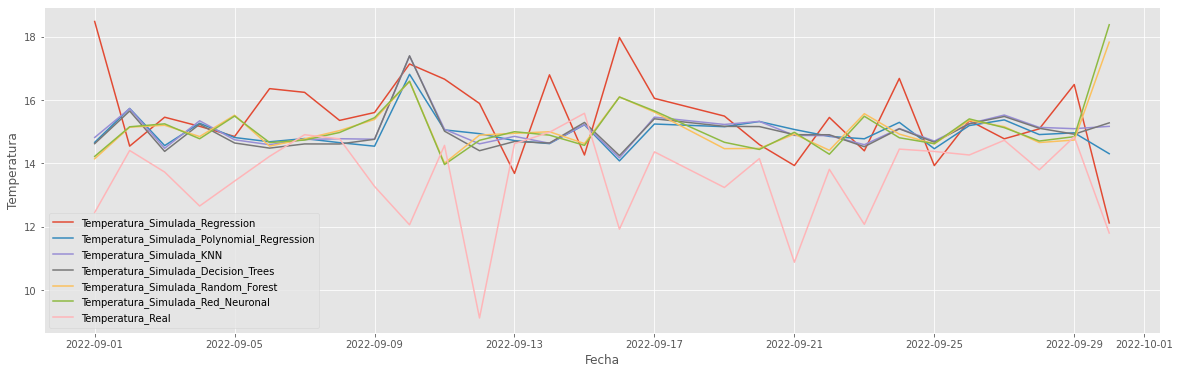

<Figure size 1152x648 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de subtramas
fig, ax = plt.subplots(figsize=(20, 6))

# Crear un gráfico de línea para cada modelo de predicción
for col in [f'{variable_objetivo}_Simulada_Regression', f'{variable_objetivo}_Simulada_Polynomial_Regression',
            f'{variable_objetivo}_Simulada_KNN', f'{variable_objetivo}_Simulada_Decision_Trees',
            f'{variable_objetivo}_Simulada_Random_Forest', f'{variable_objetivo}_Simulada_Red_Neuronal',f'{variable_objetivo}_Real']:
    ax.plot(dfFinalPruebas_Diario['FechaCompleta'], dfFinalPruebas_Diario[col], label=col)

# Agregar una leyenda y etiquetas de eje
ax.legend()
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura')

# Mostrar el gráfico
plt.show()
plt.savefig('/content/drive/MyDrive/Codigo_Final/Grafico_Promedio_Diario.png')

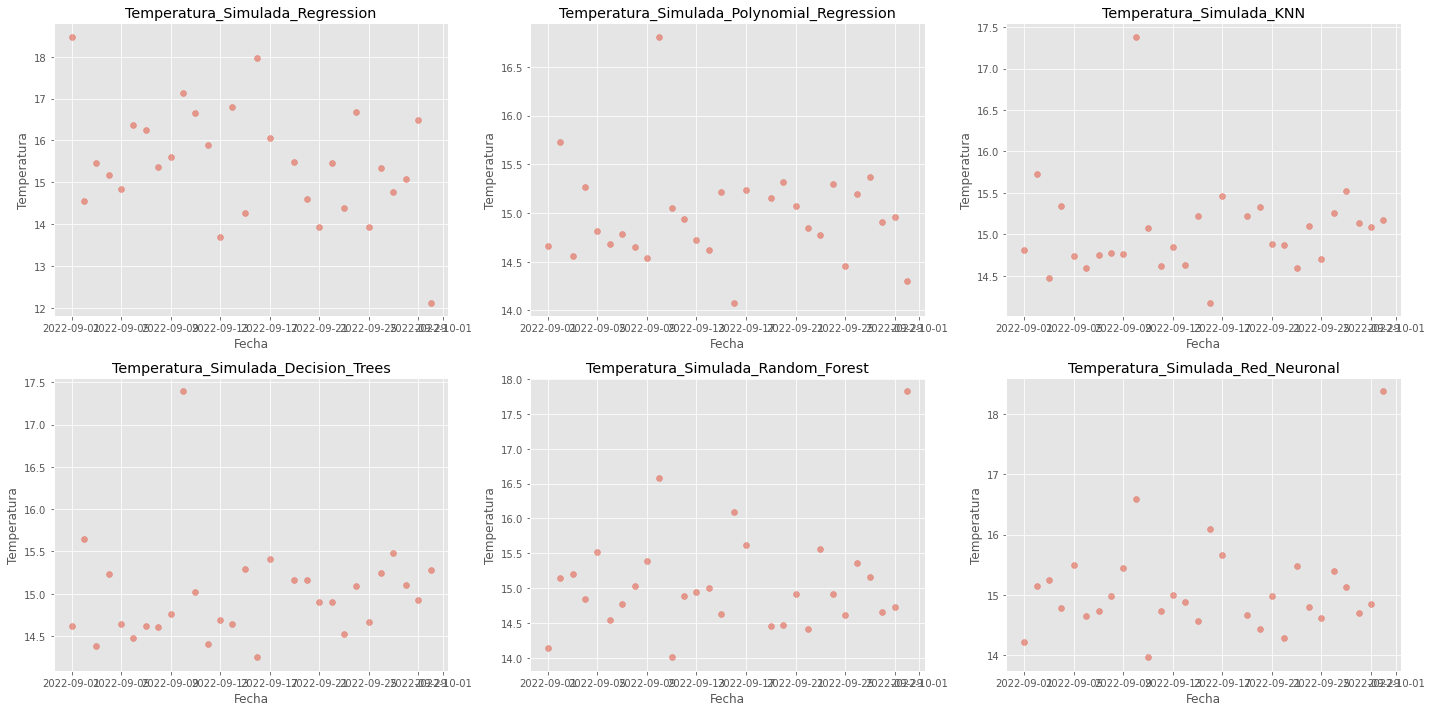

In [ ]:

# Crear una figura y un conjunto de subtramas
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

# Crear un diagrama de dispersión para cada modelo de predicción
for i, col in enumerate([f'{variable_objetivo}_Simulada_Regression', f'{variable_objetivo}_Simulada_Polynomial_Regression',
            f'{variable_objetivo}_Simulada_KNN', f'{variable_objetivo}_Simulada_Decision_Trees',
            f'{variable_objetivo}_Simulada_Random_Forest', f'{variable_objetivo}_Simulada_Red_Neuronal']):
    axs[i].scatter(dfFinalPruebas_Diario['FechaCompleta'], dfFinalPruebas_Diario[col], alpha=0.5)
    axs[i].set_title(col)
    axs[i].set_xlabel('Fecha')
    axs[i].set_ylabel(f'{variable_objetivo}')

# Ajustar los espacios entre subtramas y mostrar el gráfico
fig.tight_layout()
plt.show()